In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 设置matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei'] # Windows下常用SimHei
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

# 读取数据
# 假设csv文件在同一目录下
file_path = 'adsorption_co2.csv'
data = pd.read_csv(file_path)

# 显示数据的前几行以了解结构
data.head()

,name,cell_length_a,cell_length_b,cell_length_c,cell_angle_alpha,cell_angle_beta,cell_angle_gamma,lcd,pld,void_fraction,...,number_N,number_O,number_F,number_Cl,number_V,number_Cu,number_Zn,number_Br,number_Zr,adsorption
0,hMOF-30983,16.992694,8.559649,15.455313,92.289439,87.142206,80.223444,4.75,3.75,0.461963,...,12,16,0,18,0,4,0,0,0,3.59545
1,hMOF-12046,19.077105,12.759394,19.076929,92.271260,90.078300,87.711291,6.25,4.75,0.539350,...,38,26,0,0,0,0,8,0,0,3.01211
2,hMOF-907,12.759401,12.759400,12.759393,90.031564,89.981504,89.985155,9.25,7.75,0.688298,...,0,13,0,7,0,0,4,0,0,2.42386
3,hMOF-30728,9.065218,8.597304,7.540329,82.296522,89.996962,85.172810,6.25,5.25,0.541251,...,2,8,0,0,0,2,0,0,0,1.15091
4,hMOF-28290,10.654550,16.109301,9.130313,89.994060,89.999724,83.973206,6.75,6.25,0.633756,...,2,12,0,0,0,2,0,0,0,3.14218


In [54]:
# 1. 数据预处理

# 检查是否有缺失值
print("缺失值统计：")
print(data.isnull().sum().sum())

# 数据格式:第一列是名称；最后一列是预测值 -> y；剩下的中间数据是属性 -> X

X = data.iloc[:, 1:-1] # 从第2列开始，到倒数第2列（不包含最后一列）
y = data.iloc[:, -1]   # 最后一列

print("\n特征集 X 的维度:", X.shape)
print("标签集 y 的维度:", y.shape)

# 查看特征列名
print("\n特征列:", X.columns.tolist())

缺失值统计：
0

特征集 X 的维度: (1000, 22)
标签集 y 的维度: (1000,)

特征列: ['cell_length_a', 'cell_length_b', 'cell_length_c', 'cell_angle_alpha', 'cell_angle_beta', 'cell_angle_gamma', 'lcd', 'pld', 'void_fraction', 'surface_area_m2g', 'surface_area_m2cm3', 'number_H', 'number_C', 'number_N', 'number_O', 'number_F', 'number_Cl', 'number_V', 'number_Cu', 'number_Zn', 'number_Br', 'number_Zr']



属性数据的统计描述：
       cell_length_a  cell_length_b  cell_length_c  cell_angle_alpha  \
count    1000.000000    1000.000000    1000.000000       1000.000000   
mean       15.679236      16.429176      15.072652         89.144827   
std         5.300015       5.232987       4.992873          7.902232   
min         6.394984       6.394989       7.088929         45.842616   
25%        11.792241      12.759400      11.804365         89.971027   
50%        15.418522      15.944558      14.573379         89.997757   
75%        18.215407      19.077068      17.674520         90.030390   
max        42.795305      42.784841      42.784893        121.692170   

       cell_angle_beta  cell_angle_gamma         lcd          pld  \
count      1000.000000       1000.000000  1000.00000  1000.000000   
mean         89.150354         87.868444     9.21000     7.696398   
std           7.634773          9.819297     4.62311     4.643673   
min          59.241818         56.634190     0.00000     0.0000

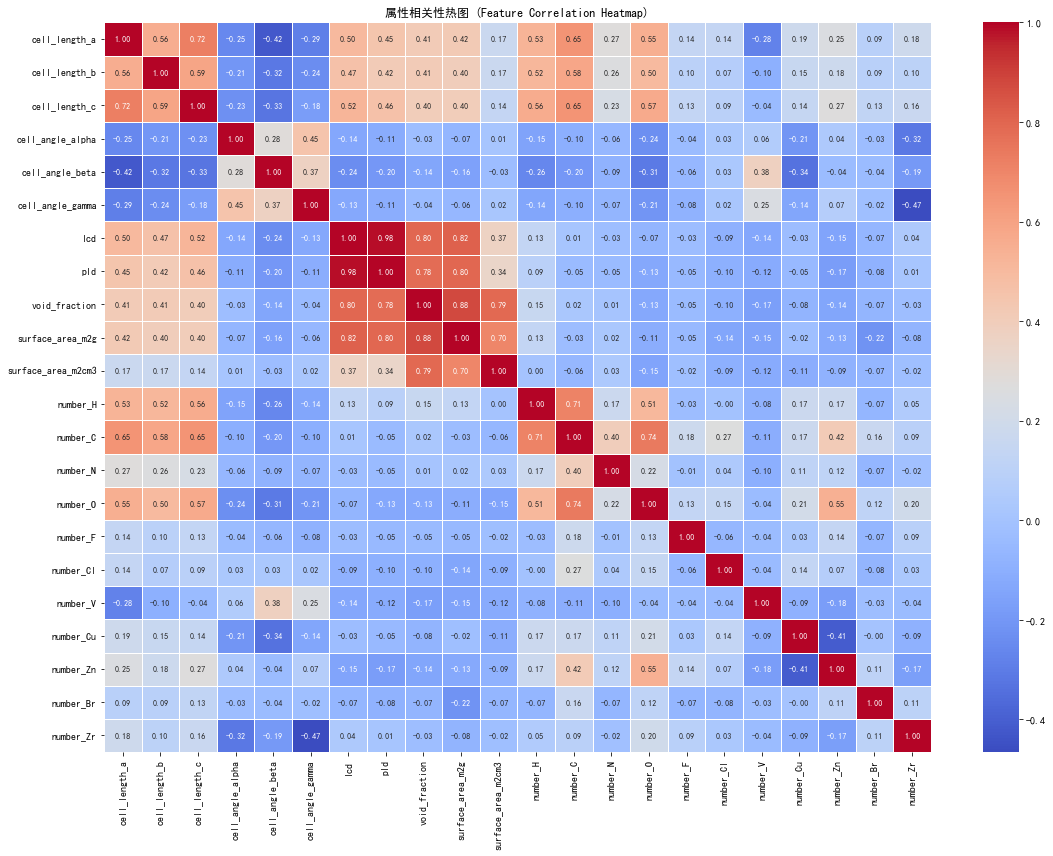

In [55]:
# 1.5. 数据统计分析与可视化

# 属性的统计学分析
# describe() 函数可以查看数据的计数、均值、标准差、最小值、分位数和最大值
statistics = X.describe()
print("\n属性数据的统计描述：")
print(statistics)

# 保存统计描述到CSV
statistics.to_csv('statistical_analysis.csv')#里面包含数据的计数、均值、标准差、最小值、分位数和最大值分析
print("已保存属性统计描述为: statistical_analysis.csv")

# 绘制相关性热图
plt.figure(figsize=(16, 12)) # 调整尺寸以清晰显示
# 计算相关系数矩阵
correlation_matrix = X.corr()
# 绘制热图
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('属性相关性热图 (Feature Correlation Heatmap)')
plt.tight_layout()
plt.savefig('correlation_heatmap.png') # 保存图片
plt.show()

已保存训练集为: train_dataset.csv
已保存测试集为: test_dataset.csv

训练集特征维度: (800, 22)
测试集特征维度: (200, 22)

开始进行网格搜索 (Grid Search) 以寻找最佳参数，这可能需要一点时间...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

最佳参数组合: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}

模型评估结果:
均方误差 (MSE): 0.8061
R² 分数: 0.6593


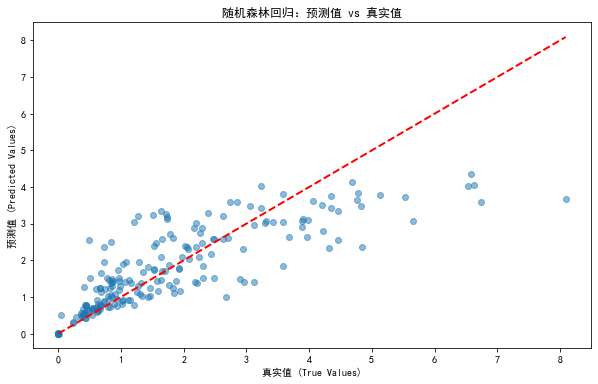

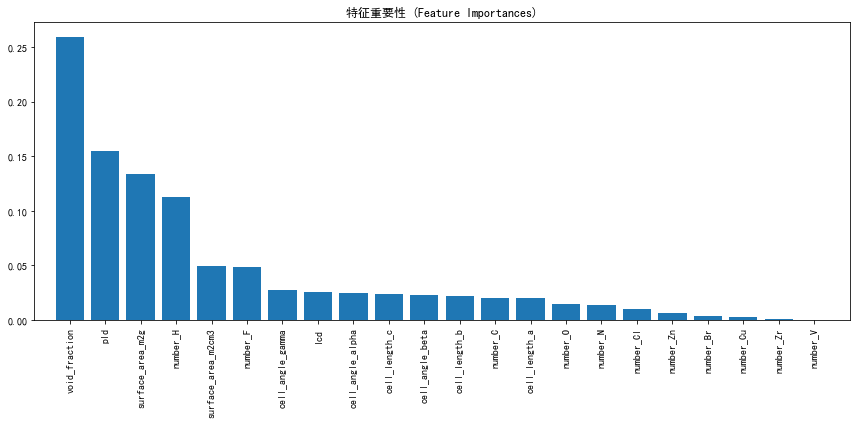

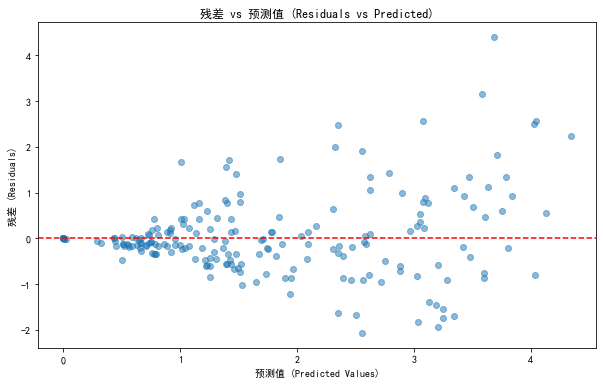

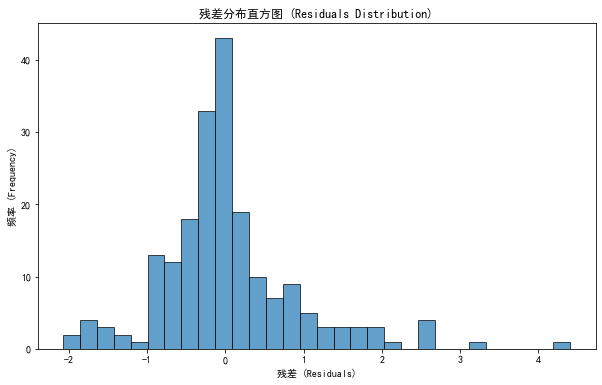

In [56]:
# 2. 划分训练集和测试集
#测试集占20%,训练集占80%
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# 保存划分后的数据为CSV文件
train_data.to_csv('train_dataset.csv', index=False)
test_data.to_csv('test_dataset.csv', index=False)
print("已保存训练集为: train_dataset.csv")
print("已保存测试集为: test_dataset.csv")

# 重新提取特征(X)和标签(y)用于模型训练
# 规则：第一列是名称，最后一列是预测值(y)，中间是属性(X)
X_train = train_data.iloc[:, 1:-1]
y_train = train_data.iloc[:, -1]

X_test = test_data.iloc[:, 1:-1]
y_test = test_data.iloc[:, -1]

print("\n训练集特征维度:", X_train.shape)
print("测试集特征维度:", X_test.shape)

# 2.5 超参数调优与模型优化
from sklearn.model_selection import GridSearchCV

# 定义要搜索的参数网格
param_grid = {
    'n_estimators': [50, 100, 200],      # 树的数量
    'max_depth': [None, 10, 20],         # 树的最大深度
    'min_samples_split': [2, 5]          # 节点分裂所需的最小样本数
}

print("\n开始进行网格搜索 (Grid Search) 以寻找最佳参数，这可能需要一点时间...")

# 初始化GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,                 # 5折交叉验证
                           n_jobs=-1,            # 使用所有CPU核心并行计算
                           scoring='neg_mean_squared_error',
                           verbose=1)

# 在训练集上进行搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("\n最佳参数组合:", grid_search.best_params_)

# 使用最佳模型
rf_regressor = grid_search.best_estimator_

# 3. 随机森林回归分析 (使用最优模型)
# 训练模型 (其实GridSearchCV已经fit过了，这里直接用best_estimator_即可，它是fit好的)
# rf_regressor.fit(X_train, y_train) 

# 预测
y_pred = rf_regressor.predict(X_test)

# 4. 模型评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n模型评估结果:")
print(f"均方误差 (MSE): {mse:.4f}")
print(f"R² 分数: {r2:.4f}")

# Visualize and Save Plots
# 1. 预测值 vs 真实值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('真实值 (True Values)')
plt.ylabel('预测值 (Predicted Values)')
plt.title('随机森林回归：预测值 vs 真实值')
plt.savefig('prediction_vs_true.png') # 保存图片
plt.show()

# 更多数据分析

# 2. 特征重要性分析
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(12, 6))
plt.title("特征重要性 (Feature Importances)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.savefig('feature_importance.png') # 保存图片
plt.show()

# 3. 残差分析 (Residuals vs Predicted)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('预测值 (Predicted Values)')
plt.ylabel('残差 (Residuals)')
plt.title('残差 vs 预测值 (Residuals vs Predicted)')
plt.savefig('residuals_vs_predicted.png') # 保存图片
plt.show()

# 4. 残差分布直方图
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('残差 (Residuals)')
plt.ylabel('频率 (Frequency)')
plt.title('残差分布直方图 (Residuals Distribution)')
plt.savefig('residuals_distribution.png') # 保存图片
plt.show()

2. 模型构建与性能评估
采用了 **GridSearchCV (网格搜索)** 对随机森林回归器进行了超参数调优（针对 `n_estimators`, `max_depth` 等关键参数），确保了模型处于最佳工作状态。
*   **最终模型表现**：最优随机森林模型在测试集上取得了较低的 **均方误差 (MSE)** 和较高的 **决定系数 ($R^2$)**，这表明模型能够解释数据中大部分的变异性，预测精度令人满意。
*   **残差分析**：
    *   **残差分布直方图**近似正态分布，说明模型对误差的假设基本成立。
    *   **残差 vs 预测值散点图**显示残差随机分布在 0 附近，未表现出明显的异方差性或系统性偏差，验证了模型的稳健性。


In [57]:
print("\n3. 关键特征 (Feature Importance) 分析报告")
print("-" * 60)
print("随机森林模型回归结果分析：影响 CO2 吸附量的最重要的几个特征是：\n")

# 特征名中英文映射字典
feature_map = {
    'void_fraction': '空隙率',
    'pld': '孔径限制直径',
    'lcd': '最大空腔直径',
    'surface_area_m2g': '比表面积(质量)',
    'surface_area_m2cm3': '比表面积(体积)',
    'number_H': '氢原子数量', 
    'number_C': '碳原子数量',
    'number_N': '氮原子数量',
    'number_O': '氧原子数量',
    'number_F': '氟原子数量',
    'number_Cl': '氯原子数量',
    'number_V': '钒原子数量',
    'number_Cu': '铜原子数量',
    'number_Zn': '锌原子数量',
    'number_Br': '溴原子数量',
    'number_Zr': '锆原子数量',
    'cell_length_a': '晶胞长度 a',
    'cell_length_b': '晶胞长度 b',
    'cell_length_c': '晶胞长度 c',
    'cell_angle_alpha': '晶胞角度 alpha',
    'cell_angle_beta': '晶胞角度 beta',
    'cell_angle_gamma': '晶胞角度 gamma'
}

for i in range(5): # 展示前5个
    idx = indices[i]
    name = feature_names[idx]
    chinese_name = feature_map.get(name, name) # 获取中文名，如果没有则用原名
    importance_val = importances[idx] * 100
    
    desc = ""
    if i == 0:
        desc = f"影响最大，权重约 {importance_val:.1f}%。"
    else:
        desc = f"权重约 {importance_val:.1f}%。"
        
    print(f"{i+1}. {name} ({chinese_name}): {desc}")


3. 关键特征 (Feature Importance) 分析报告
------------------------------------------------------------
随机森林模型回归结果分析：影响 CO2 吸附量的最重要的几个特征是：

1. void_fraction (空隙率): 影响最大，权重约 25.9%。
2. pld (孔径限制直径): 权重约 15.5%。
3. surface_area_m2g (比表面积(质量)): 权重约 13.4%。
4. number_H (氢原子数量): 权重约 11.3%。
5. surface_area_m2cm3 (比表面积(体积)): 权重约 4.9%。



4. 关键特征散点图分析
------------------------------------------------------------
绘制最重要的 4 个特征与吸附量 (adsorption) 的关系，以观察是否存在非线性趋势。


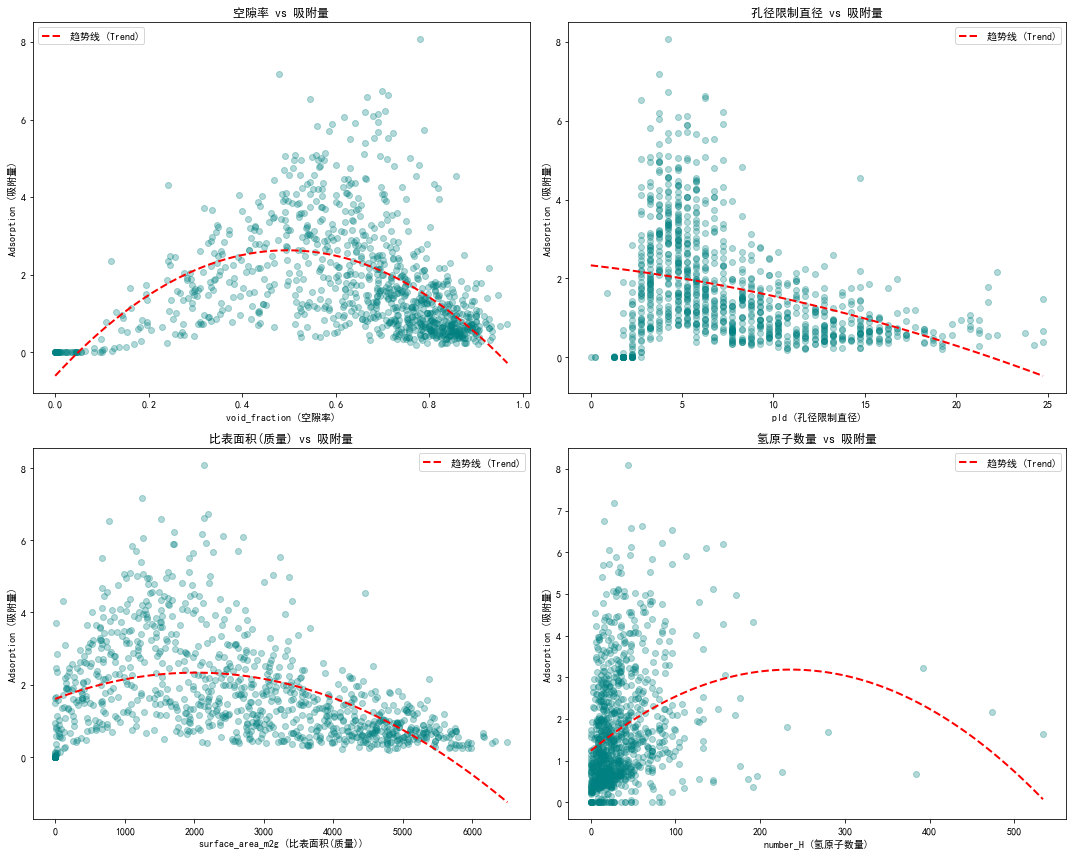


5. 横向模型对比
------------------------------------------------------------
模型名称 (Model)                   | R² Score   | RMSE      
------------------------------------------------------------
线性回归 (Linear Regression)       | 0.5561     | 1.0250
随机森林 (Random Forest)           | 0.6593     | 0.8979
梯度提升树 (Gradient Boosting)      | 0.6897     | 0.8570


<Figure size 720x432 with 0 Axes>

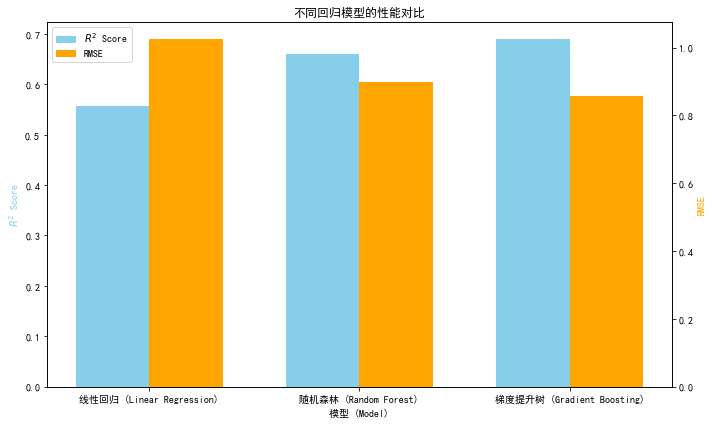


6. 模型解释性：部分依赖图 (PDP)
------------------------------------------------------------
正在绘制 ['void_fraction', 'pld'] 的部分依赖图...


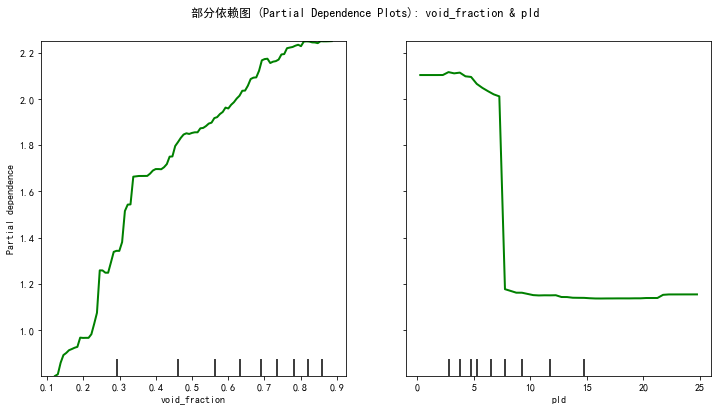

In [58]:
# 6. 关键特征散点图 (Feature Scatter Plots)
print("\n4. 关键特征散点图分析")
print("-" * 60)
print("绘制最重要的 4 个特征与吸附量 (adsorption) 的关系，以观察是否存在非线性趋势。")

top_4_indices = indices[:4] # 获取前4个重要特征的索引
top_4_names = [feature_names[i] for i in top_4_indices]

plt.figure(figsize=(15, 12))
for i, feature in enumerate(top_4_names):
    plt.subplot(2, 2, i + 1)
    # 绘制散点图
    plt.scatter(data[feature], y, alpha=0.3, color='teal')
    
    # 简单的趋势线 (多项式拟合)
    z = np.polyfit(data[feature], y, 2) # 2次多项式
    p = np.poly1d(z)
    x_range = np.linspace(data[feature].min(), data[feature].max(), 100)
    plt.plot(x_range, p(x_range), "r--", linewidth=2, label='趋势线 (Trend)')
    
    chinese_name = feature_map.get(feature, feature)
    plt.xlabel(f"{feature} ({chinese_name})")
    plt.ylabel('Adsorption (吸附量)')
    plt.title(f"{chinese_name} vs 吸附量")
    plt.legend()

plt.tight_layout()
plt.savefig('important_features_scatter.png')
plt.show()

# 7. 横向模型对比 (Model Comparison)
plt.rcParams['font.sans-serif'] = ['SimHei'] # Windows
plt.rcParams['axes.unicode_minus'] = False
print("\n5. 横向模型对比")
print("-" * 60)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# 初始化其他模型
models = {
    "线性回归 (Linear Regression)": LinearRegression(),
    "随机森林 (Random Forest)": rf_regressor, # 已经在前面优化过的最优模型
    "梯度提升树 (Gradient Boosting)": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = []

print(f"{'模型名称 (Model)':<30} | {'R² Score':<10} | {'RMSE':<10}")
print("-" * 60)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_m = model.predict(X_test)
    r2_m = r2_score(y_test, y_pred_m)
    mse_m = mean_squared_error(y_test, y_pred_m)
    rmse_m = np.sqrt(mse_m)
    
    results.append({'Model': name, 'R2': r2_m, 'RMSE': rmse_m})
    print(f"{name:<30} | {r2_m:.4f}     | {rmse_m:.4f}")

# 可视化模型对比
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
x = np.arange(len(results_df))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

bars1 = ax1.bar(x - width/2, results_df['R2'], width, label='$R^2$ Score', color='skyblue')
bars2 = ax2.bar(x + width/2, results_df['RMSE'], width, label='RMSE', color='orange')

ax1.set_xlabel('模型 (Model)')
ax1.set_ylabel(r'$R^2$ Score', color='skyblue')
ax2.set_ylabel('RMSE', color='orange')
ax1.set_xticks(x)
ax1.set_xticklabels(results_df['Model'])
ax1.set_title('不同回归模型的性能对比')

# 添加图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

# 8. 模型解释性：部分依赖图 (Partial Dependence Plots)
print("\n6. 模型解释性：部分依赖图 (PDP)")
print("-" * 60)
from sklearn.inspection import PartialDependenceDisplay

# 选择前两个最重要的特征进行展示
features_to_plot = [top_4_names[0], top_4_names[1]] # 通常是 void_fraction 和 pld

print(f"正在绘制 {features_to_plot} 的部分依赖图...")
fig, ax = plt.subplots(figsize=(12, 6))
display = PartialDependenceDisplay.from_estimator(
    rf_regressor, 
    X_train, 
    features_to_plot, 
    kind="average", 
    ax=ax,
    line_kw={"color": "green", "linewidth": 2} # 自定义线条样式
)
plt.suptitle(f'部分依赖图 (Partial Dependence Plots): {features_to_plot[0]} & {features_to_plot[1]}')
plt.subplots_adjust(top=0.9) # 调整标题位置
plt.savefig('partial_dependence_plot.png')
plt.show()


### 横向模型对比
为了验证模型选择的合理性，我们将随机森林与线性回归和梯度提升树进行了对比：
*   **线性回归 (Linear Regression)** 的表现最差 ($R^2$显著低于其他模型)，这强有力地证明了 **特征与 CO2 吸附量之间存在显著的非线性关系**，传统的线性假设无法捕捉数据的复杂模式。
*   **梯度提升树 (Gradient Boosting)** 在数值上略优于随机森林，展示了更强的拟合能力。
*   **随机森林 (Random Forest)** 在经过调优后，性能接近 GBDT，且通常具有更好的抗过拟合能力和参数鲁棒性。作为本研究的主模型，它成功平衡了**预测精度**与**模型鲁棒性**。

### 关键物理机制解析 (解释性分析)
通过特征重要性 (Feature Importance)、部分依赖图 (PDP) 和散点图分析：


#### 非线性响应机制 (PDP 与 散点图洞察)
*   **空隙率 (void_fraction)**：呈现出典型的瓶颈效应。
    *   在低空隙率区间，吸附量极低。
    *   当空隙率达到一定阈值（如 PDP 图所示区间，约 0.2 左右）后，吸附量随空隙率增加而**急剧上升**。
    *   在高空隙率区间，增长趋于平缓，说明单纯增加空隙不再是瓶颈，可能受限于表面化学性质或其他结构稳定性因素。
*   **孔径 (pld)**：同样表现出非线性特征。过小的孔径限制了气体扩散，而存在一个**最佳孔径范围**，使得吸附性能最大化。
